Problem 1

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
continuous_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_filled = df[continuous_cols].fillna(df[continuous_cols].mean())

In [37]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
cluster_labels = model.fit_predict(df_scaled)  
df['Cluster'] = cluster_labels

In [38]:
df_filled['Cluster'] = cluster_labels
df_filled['origin'] = df['origin']  
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,Cluster
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [39]:
#calculate
print("\n[Cluster Statistics] Mean and Variance for Each Cluster:")
print(df_filled.groupby(df['Cluster']).agg(['mean', 'var']))

print("\n[Origin Statistics] Mean and Variance for Each Origin:")
print(df_filled.groupby(df['origin']).agg(['mean', 'var']))


[Cluster Statistics] Mean and Variance for Each Cluster:
               mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
Cluster                                                               
0        26.177441  41.303375   144.304714  3511.485383   86.490964   
1        14.528866   4.771033   348.020619  2089.499570  161.804124   
2        43.700000   0.300000    91.750000    12.250000   49.000000   

                          weight                acceleration            \
                var         mean            var         mean       var   
Cluster                                                                  
0        295.270673  2598.414141  299118.709664    16.425589  4.875221   
1        674.075816  4143.969072  193847.051117    12.641237  3.189948   
2          4.000000  2133.750000   21672.916667    22.875000  2.309167   

        Cluster         origin            
           mean  var      m


[Cross-Tabulation of Origin vs Cluster]:
Cluster    0   1  2  All
origin                  
1        152  97  0  249
2         66   0  4   70
3         79   0  0   79
All      297  97  4  398


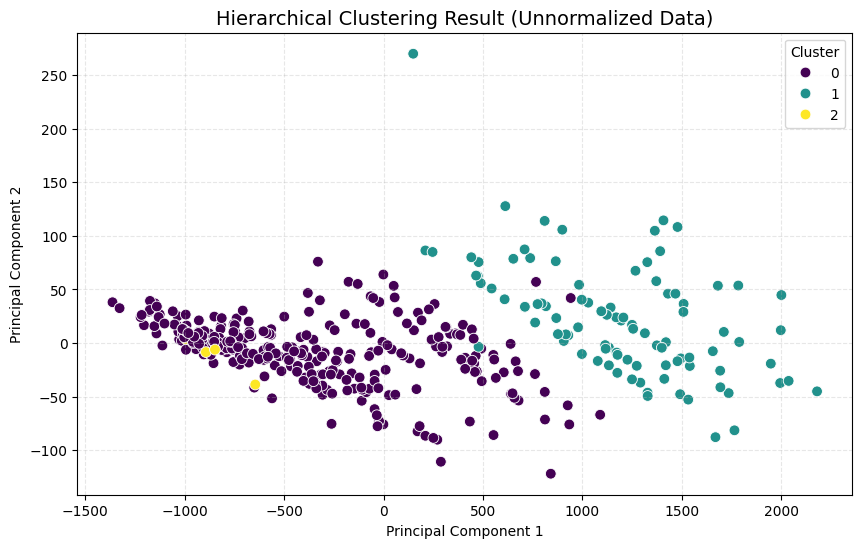

In [40]:
# analysis
print("\n[Cross-Tabulation of Origin vs Cluster]:")
print(pd.crosstab(df['origin'], df['Cluster'], margins=True))

# PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_filled)  # Use original unnormalized data

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_pca[:, 0], 
    y=df_pca[:, 1], 
    hue=df['Cluster'], 
    palette='viridis', 
    s=60
)
plt.title('Hierarchical Clustering Result (Unnormalized Data)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(linestyle='--', alpha=0.3)
plt.show()

Problem 2

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
plt.rcParams['font.family'] ='SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [58]:
file_path = r"E:\代码库\dataMining\Boston.csv"
try:
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.upper()
except Exception as e:
    print("False")
    exit()
df.head()

,UNNAMED: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [59]:
X = df.drop('MEDV', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
silhouette_scores = []
best_k = 2
best_score = -1

print("\nCalculating silhouette scores for different k values:")
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

    print(f"k={k}: Silhouette Score = {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

optimal_kmeans = KMeans(n_clusters=best_k, random_state=42)
optimal_labels = optimal_kmeans.fit_predict(X_scaled)

cluster_counts = pd.Series(optimal_labels).value_counts().sort_index()
print(f"\nOptimal clustering results (k={best_k}):")
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} samples")

cluster_means = X.groupby(optimal_labels).mean()

centroids_scaled = optimal_kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=X.columns)

differences = cluster_means - centroids_df

print("\nOptimal number of clusters k={} (Silhouette Score={:.4f})".format(best_k, best_score))
print("=" * 50 + "\n")

print("\nFeature means for each cluster (original data):")
print(cluster_means)

print("\nCentroid coordinates for each cluster (inverse-transformed):")
print(centroids_df)

print("\nDifferences between means and centroids:")
print(differences)


Calculating silhouette scores for different k values:
k=2: Silhouette Score = 0.3580
k=3: Silhouette Score = 0.2454
k=4: Silhouette Score = 0.2430
k=5: Silhouette Score = 0.2355
k=6: Silhouette Score = 0.2368

Optimal clustering results (k=2):
Cluster 0: 335 samples
Cluster 1: 171 samples

Optimal number of clusters k=2 (Silhouette Score=0.3580)


Feature means for each cluster (original data):
   UNNAMED: 0       CRIM         ZN      INDUS      CHAS       NOX        RM  \
0  193.620896   0.287682  17.164179   7.178179  0.068657  0.489041  6.448764   
1  370.807018  10.129061   0.000000  18.891930  0.070175  0.683316  5.963094   

         AGE       DIS        RAD         TAX    PTRATIO           B  \
0  57.049552  4.710233   4.459701  302.480597  17.794030  384.797612   
1  91.153801  2.002125  19.520468  615.421053  19.751462  301.578129   

       LSTAT  
0   9.519254  
1  18.792398  

Centroid coordinates for each cluster (inverse-transformed):
   UNNAMED: 0       CRIM            

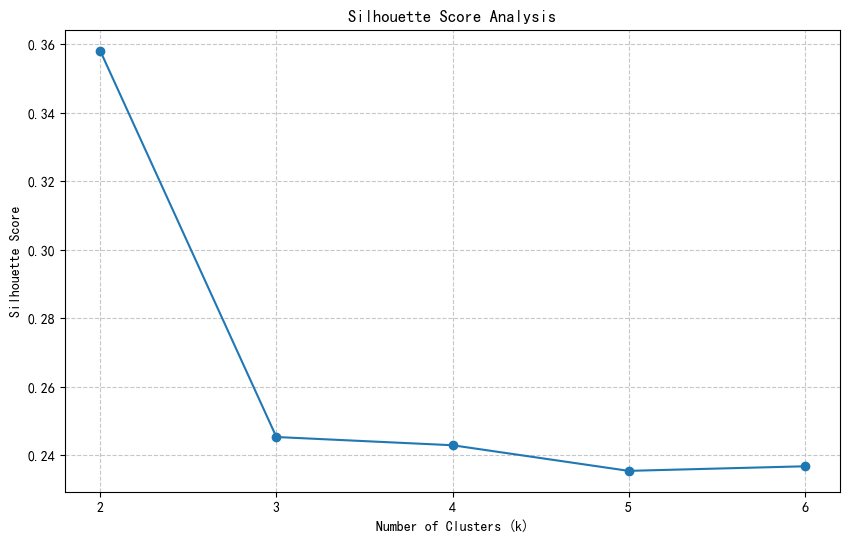

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(2, 7))
plt.show()

Problem 3

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score

In [66]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

X = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

homogeneity = homogeneity_score(df['target'], cluster_labels)
completeness = completeness_score(df['target'], cluster_labels)

print(f"\nNumber of clusters: k={k}")
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")


Number of clusters: k=3
Homogeneity: 0.8788
Completeness: 0.8730
